# Further research into timeseries

- Markov chains 

- Find corelation between index changes of different companies;
- Correlation matrix!
- Compare corelation with average corelation
- Think about algorithm on how to find timeseries corelation;
- Find data! (EOD trading tada)

               open     high      low    close    volume  unadjustedVolume  \
date                                                                         
2014-02-21  69.9727  70.2061  68.8967  68.9821  69757247           9965321   
2014-02-24  68.7063  69.5954  68.6104  69.2841  72364950          10337850   
2014-02-25  69.5245  69.5488  68.4239  68.5631  58247350           8321050   
2014-02-26  68.7667  68.9492  67.7147  67.9446  69131286           9875898   
2014-02-27  67.9170  69.4457  67.7738  69.2999  75557321          10793903   

              change  changePercent     vwap       label  changeOverTime  
date                                                                      
2014-02-21 -0.774858         -1.111  69.4256  Feb 21, 14        0.000000  
2014-02-24  0.302061          0.438  69.1567  Feb 24, 14        0.004378  
2014-02-25 -0.721010         -1.041  68.9153  Feb 25, 14       -0.006074  
2014-02-26 -0.618575         -0.902  68.1373  Feb 26, 14       -0.015040  
201

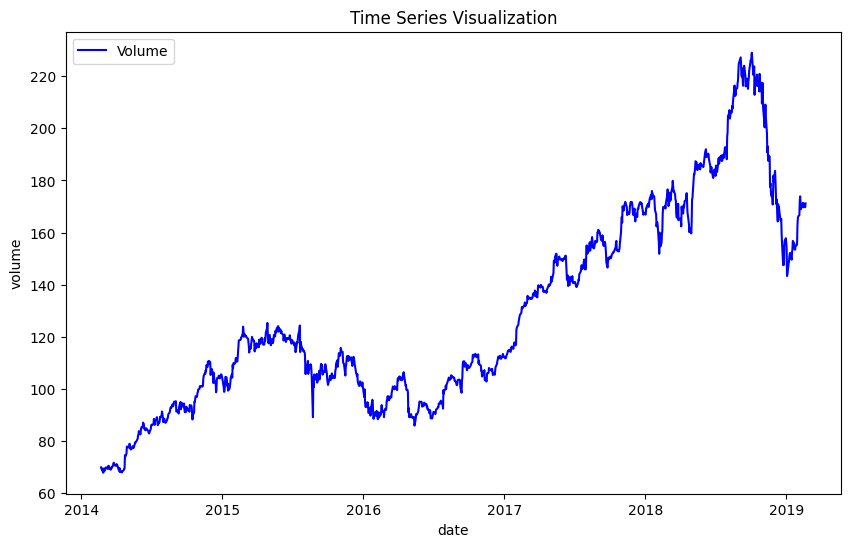

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load the CSV file
data = pd.read_csv('../resources/dow-jones/AAPL.csv')

# Ensure the data has a datetime index and a single time series column
data['date'] = pd.to_datetime(data['date'])  # Assuming a 'Date' column
data.set_index('date', inplace=True)

# Preview the data
print(data.head()) 

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['open'], label='Volume', color='blue')
plt.title('Time Series Visualization')
plt.xlabel('date')
plt.ylabel('volume')
plt.legend()
plt.show()

In [3]:
path = '../resources/dow-jones' 
timeseries_data = {}

for filename in os.listdir(path):
    if filename.endswith('.csv'):
        file_path = os.path.join(path, filename)
        df = pd.read_csv(file_path)
        marker = filename.split('.')[0] 
        df['date'] = pd.to_datetime(df['date'])  # Assuming a 'Date' column
        df.set_index('date', inplace=True)
        timeseries_data[marker] = df

list(timeseries_data.keys())

['AAPL',
 'AXP',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'DIS',
 'DWDP',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UNH',
 'UTX',
 'V',
 'VZ',
 'WBA',
 'WMT',
 'XOM']

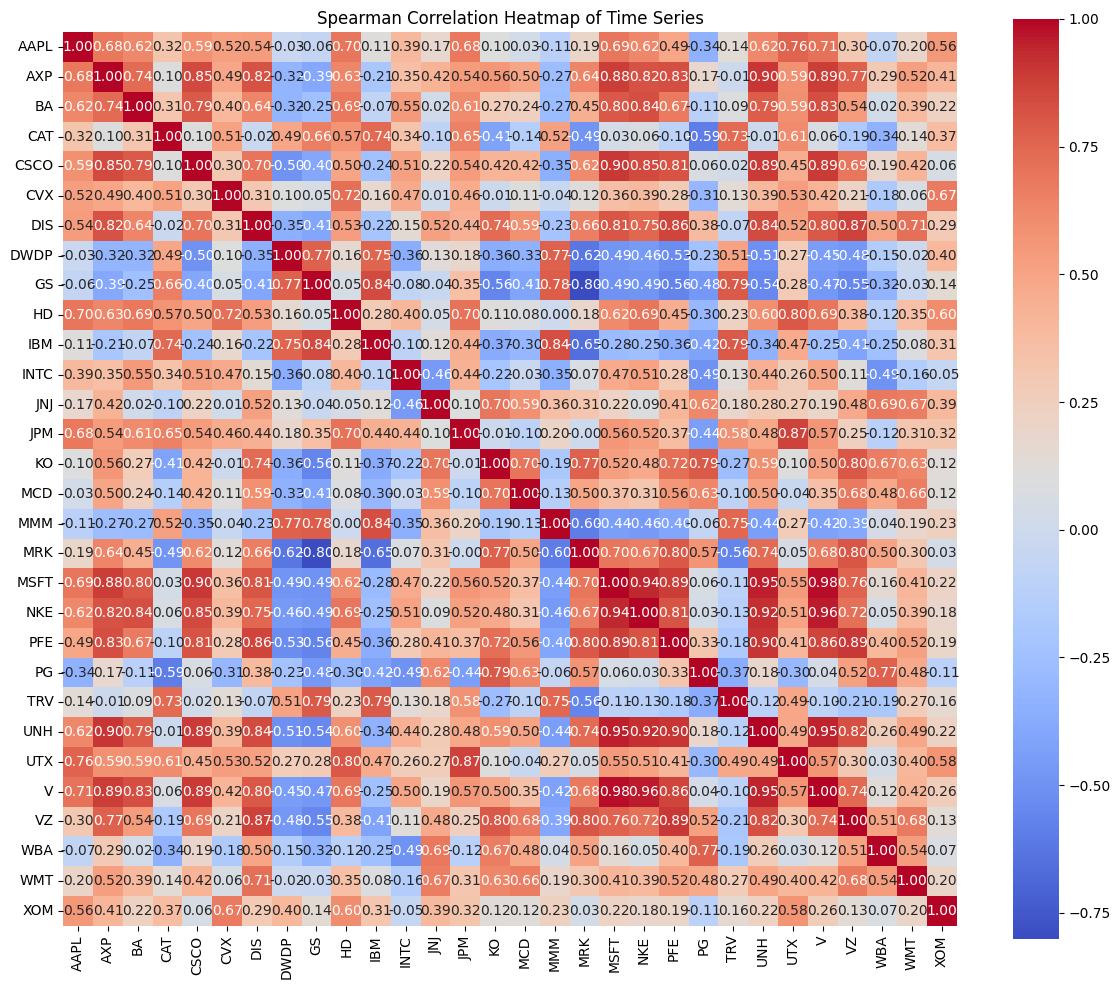

In [4]:
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

combined_df = pd.DataFrame()

for name, df in timeseries_data.items():
    if 'close' in df.columns:
        combined_df[name] = df['close']
    else:
        print(f"Warning: '{name}' has no 'close' column")

# Step 3: Drop rows with missing values
combined_df.dropna(inplace=True)

# Step 4: Compute Spearman correlation matrix
spearman_corr = combined_df.corr(method='spearman')

# Step 5: Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Spearman Correlation Heatmap of Time Series')
plt.tight_layout()
plt.show()

**Dow Jones markers:**


| Ticker | Company Name                    | Sector                             |
| ------ | ------------------------------- | ---------------------------------- |
| AAPL   | Apple Inc.                      | Information Technology             |
| AXP    | American Express Co.            | Financials                         |
| BA     | Boeing Co.                      | Industrials                        |
| CAT    | Caterpillar Inc.                | Industrials                        |
| CSCO   | Cisco Systems Inc.              | Information Technology             |
| CVX    | Chevron Corporation             | Energy                             |
| DIS    | The Walt Disney Company         | Communication Services             |
| DWDP   | DowDuPont Inc. (now Dow Inc.)   | Materials                          |
| GS     | Goldman Sachs Group Inc.        | Financials                         |
| HD     | The Home Depot Inc.             | Consumer Discretionary             |
| IBM    | International Business Machines | Information Technology             |
| INTC   | Intel Corporation               | Information Technology             |
| JNJ    | Johnson & Johnson               | Health Care                        |
| JPM    | JPMorgan Chase & Co.            | Financials                         |
| KO     | Coca-Cola Company               | Consumer Staples                   |
| MCD    | McDonald's Corporation          | Consumer Discretionary             |
| MMM    | 3M Company                      | Industrials                        |
| MRK    | Merck & Co., Inc.               | Health Care                        |
| MSFT   | Microsoft Corporation           | Information Technology             |
| NKE    | Nike, Inc.                      | Consumer Discretionary             |
| PFE    | Pfizer Inc.                     | Health Care                        |
| PG     | Procter & Gamble Co.            | Consumer Staples                   |
| TRV    | The Travelers Companies Inc.    | Financials                         |
| UNH    | UnitedHealth Group Inc.         | Health Care                        |
| UTX    | United Technologies Corporation | Industrials (now part of Raytheon) |
| V      | Visa Inc.                       | Information Technology             |
| VZ     | Verizon Communications Inc.     | Communication Services             |
| WBA    | Walgreens Boots Alliance Inc.   | Consumer Staples                   |
| WMT    | Walmart Inc.                    | Consumer Staples                   |
| XOM    | Exxon Mobil Corporation         | Energy                             |


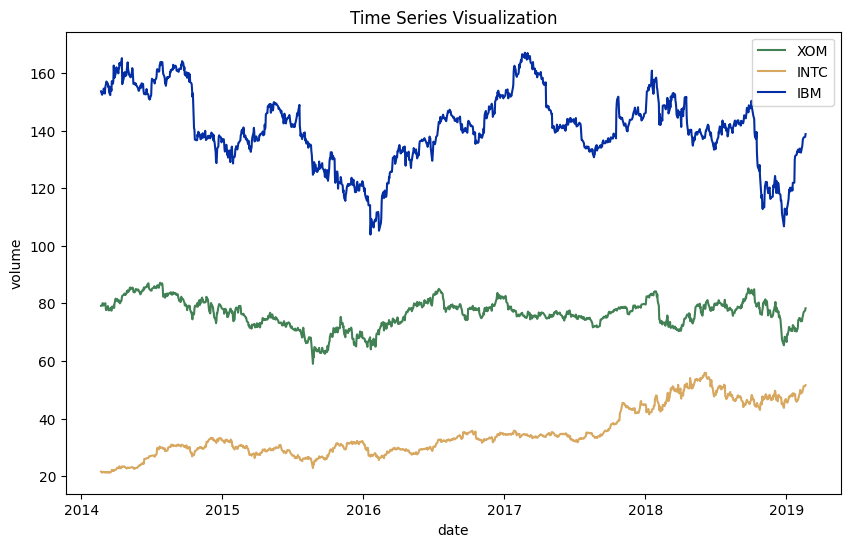

In [7]:
def display(dict):
    plt.figure(figsize=(10, 6))
    for name, value in dict.items():
        plt.plot(data.index, value['open'], label=name, color=np.random.rand(3,))
    plt.title('Time Series Visualization')
    plt.xlabel('date')
    plt.ylabel('volume')
    plt.legend()
    plt.show()

keys_to_take = ['XOM', 'INTC', 'IBM']
display({k: timeseries_data[k] for k in keys_to_take if k in timeseries_data})